## KNN with Leo's pipeline

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

In [2]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

In [3]:
df = pd.read_csv('/home/ben/code/MathmoBen/TrainDelays/clean_data_final.csv')

In [4]:
df.columns

Index(['TRAIN_SERVICE_CODE_AFFECTED', 'SERVICE_GROUP_CODE_AFFECTED',
       'ENGLISH_DAY_TYPE', 'APP_TIMETABLE_FLAG_AFF', 'UNIT_CLASS_AFFECTED',
       'INCIDENT_REASON', 'PERFORMANCE_EVENT_CODE', 'PFPI_MINUTES', 'Lat_OR',
       'Lon_OR', 'Lat_DES', 'Lon_DES', 'ORIG_MONTH_SIN', 'ORIG_MONTH_COS',
       'ORIG_DAY_SIN', 'ORIG_DAY_COS', 'ORIG_HOUR_SIN', 'ORIG_HOUR_COS',
       'ORIG_MINUTE_SIN', 'ORIG_MINUTE_COS', 'DEST_MONTH_SIN',
       'DEST_MONTH_COS', 'DEST_DAY_SIN', 'DEST_DAY_COS', 'DEST_HOUR_SIN',
       'DEST_HOUR_COS', 'DEST_MINUTE_SIN', 'DEST_MINUTE_COS'],
      dtype='object')

In [5]:
X = df.drop(columns = 'PFPI_MINUTES')
y = df['PFPI_MINUTES']

In [6]:
num_transformer = MinMaxScaler()

cat_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output = False)

transformer = make_column_transformer((num_transformer, ['Lat_OR','Lon_OR', 'Lat_DES','Lon_DES']),
                                  (cat_transformer, ['ENGLISH_DAY_TYPE', 'SERVICE_GROUP_CODE_AFFECTED', 'INCIDENT_REASON',
                                                        'UNIT_CLASS_AFFECTED', 'TRAIN_SERVICE_CODE_AFFECTED', 
                                                     'PERFORMANCE_EVENT_CODE', 
                                                     'APP_TIMETABLE_FLAG_AFF']),
                                remainder = 'passthrough')


pipe = Pipeline([('transformer', transformer)])

pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['Lat_OR', 'Lon_OR',
                                                   'Lat_DES', 'Lon_DES']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['ENGLISH_DAY_TYPE',
                                                   'SERVICE_GROUP_CODE_AFFECTED',
                                                   'INCIDENT_REASON',
                                                   'UNIT_CLASS_AFFECTED',
                                                   'TRAIN_SERVICE_CODE_AFFECTED',
                                                   'PERFORMANCE_EVENT_CODE',
                                                   'APP_TIMETABLE_FLAG_AFF'])]))])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='PFPI_MINUTES'), df['PFPI_MINUTES'], test_size=0.2)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((394600, 27), (98651, 27), (394600,), (98651,))

In [10]:
pipe.fit(X_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['Lat_OR', 'Lon_OR',
                                                   'Lat_DES', 'Lon_DES']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['ENGLISH_DAY_TYPE',
                                                   'SERVICE_GROUP_CODE_AFFECTED',
                                                   'INCIDENT_REASON',
                                                   'UNIT_CLASS_AFFECTED',
                                                   'TRAIN_SERVICE_CODE_AFFECTED',
                                                   'PERFORMANCE_EVENT_CODE',
                                                   'APP_TIMETABLE_FLAG_AFF'])]))])

In [11]:
X_processed = pipe.transform(X_train)
X_processed

array([[ 0.6320295 ,  0.51840314,  0.52557029, ...,  0.40673664,
         0.58778525,  0.80901699],
       [ 0.50655971,  0.5413115 ,  0.52213911, ...,  0.74314483,
         0.66913061,  0.74314483],
       [ 0.62442527,  0.44697972,  0.54730107, ...,  0.20791169,
        -0.9781476 , -0.20791169],
       ...,
       [ 0.52189182,  0.40983624,  0.50529234, ..., -0.5       ,
        -0.30901699,  0.95105652],
       [ 0.28362597,  0.4497056 ,  0.36959085, ..., -0.40673664,
        -0.40673664,  0.91354546],
       [ 0.44037819,  0.231319  ,  0.44037819, ...,  0.66913061,
        -0.74314483,  0.66913061]])

In [12]:
knn_model = KNeighborsRegressor(n_neighbors = 5)

cv_results = cross_validate(knn_model, X_processed,y_train, scoring = 'neg_root_mean_squared_error')

base_knn_score = cv_results['test_score'].mean()

base_knn_score

-4.683554026065139

In [13]:
knn_model = KNeighborsRegressor(n_neighbors = 7)

cv_results = cross_validate(knn_model, X_processed,y_train, scoring = 'neg_root_mean_squared_error')

base_knn_score = cv_results['test_score'].mean()

base_knn_score

-4.5903543016647035

In [14]:
knn_model = KNeighborsRegressor(n_neighbors = 9)

cv_results = cross_validate(knn_model, X_processed,y_train, scoring = 'neg_root_mean_squared_error')

base_knn_score = cv_results['test_score'].mean()

base_knn_score

-4.529081467159554

In [15]:
knn_model = KNeighborsRegressor(n_neighbors = 11)

cv_results = cross_validate(knn_model, X_processed,y_train, scoring = 'neg_root_mean_squared_error')

base_knn_score = cv_results['test_score'].mean()

base_knn_score

-4.503116734953213

In [16]:
knn_model = KNeighborsRegressor(n_neighbors = 13)

cv_results = cross_validate(knn_model, X_processed,y_train, scoring = 'neg_root_mean_squared_error')

base_knn_score = cv_results['test_score'].mean()

base_knn_score

-4.49005359579635

In [20]:
knn_model = KNeighborsRegressor(n_neighbors = 15)

cv_results = cross_validate(knn_model, X_processed,y_train, scoring = 'neg_root_mean_squared_error')

base_knn_score = cv_results['test_score'].mean()

base_knn_score

-4.493322474887277

In [17]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Lon_OR', ylabel='Lat_OR'>

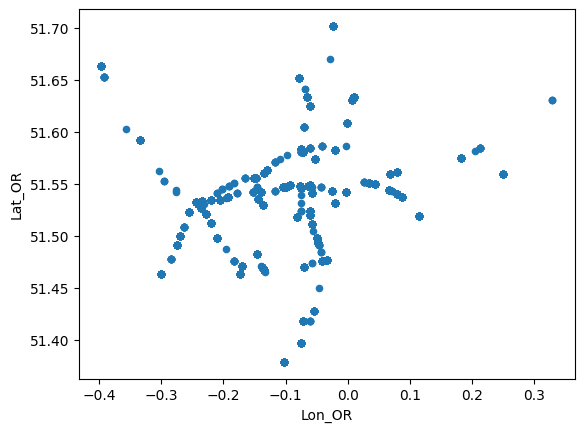

In [18]:
df.plot.scatter(x = 'Lon_OR', y = 'Lat_OR')

In [19]:
df['Lon_OR'].max()

0.329878667